In [1]:
#Importing library!

In [2]:
import datetime as dt
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr


In [3]:
yf.pdr_override()

In [4]:
#Step 1 : selecting dates 

In [5]:
end=dt.datetime.now()
#dt.datetime.today() is the same
start=end-dt.timedelta(days=400)
#dt.datetime(YYYY,MM,DD) can be used also
start,end
#The display is (YYYY,MM,DD,hour,minute,second,microsecond)

(datetime.datetime(2022, 3, 9, 21, 0, 9, 227448),
 datetime.datetime(2023, 4, 13, 21, 0, 9, 227448))

In [6]:
#Step 2: selecting stocks to analyse
#https://sg.finance.yahoo.com/ to check tickers

In [7]:
stocklist=['TSLA','BABA','GOOG']
stocklist

['TSLA', 'BABA', 'GOOG']

In [8]:
#step 3 : call pandas data reder module

In [9]:
df = pdr.get_data_yahoo(stocklist,start,end)
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
#df.head() = first 5 row
#df.tail() = last 5 row
df.tail()

[*********************100%***********************]  3 of 3 completed


Adj Close                               Close               
                  BABA        GOOG        TSLA        BABA        GOOG   
Date                                                                     
2023-04-05   98.550003  104.949997  185.520004   98.550003  104.949997  \
2023-04-06  102.739998  108.900002  185.059998  102.739998  108.900002   
2023-04-10  101.540001  106.949997  184.509995  101.540001  106.949997   
2023-04-11   99.760002  106.120003  186.789993   99.760002  106.120003   
2023-04-12   93.839996  105.220001  180.539993   93.839996  105.220001   

                              High                                 Low   
                  TSLA        BABA        GOOG        TSLA        BABA   
Date                                                                     
2023-04-05  185.520004  100.449997  106.540001  190.679993   97.660004  \
2023-04-06  185.059998  103.239998  109.629997  186.389999   98.269997   
2023-04-10  184.509995  102.830002  107.970001  185.100006  100.589996   
2023-04-11  186.789993  102.540001  107.220001  189.190002   99.199997   
2023-04-12  180.539993   98.889999  107.586998  191.580002   93.580002   

                                          Open                           
                  GOOG        TSLA        BABA        GOOG        TSLA   
Date                                                                     
2023-04-05  104.101997  183.759995   99.239998  106.120003  190.520004  \
2023-04-06  104.815002  179.740005   98.529999  105.769997  183.080002   
2023-04-10  105.599998  176.110001  100.620003  107.389999  179.940002   
2023-04-11  105.279999  185.649994  102.459999  106.919998  186.690002   
2023-04-12  104.970001  180.309998   97.820000  107.389999  190.740005   

              Volume                       
                BABA      GOOG       TSLA  
Date                                       
2023-04-05  20117700  21864200  133882500  
2023-04-06  26849200  34684200  123857900  
2023-04-10  16308300  19741500  142154600  
2023-04-11  19017700  18721300  115770900  
2023-04-12  35100100  22742600  149783500

In [10]:
df.columns

MultiIndex([('Adj Close', 'BABA'),
            ('Adj Close', 'GOOG'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'BABA'),
            (    'Close', 'GOOG'),
            (    'Close', 'TSLA'),
            (     'High', 'BABA'),
            (     'High', 'GOOG'),
            (     'High', 'TSLA'),
            (      'Low', 'BABA'),
            (      'Low', 'GOOG'),
            (      'Low', 'TSLA'),
            (     'Open', 'BABA'),
            (     'Open', 'GOOG'),
            (     'Open', 'TSLA'),
            (   'Volume', 'BABA'),
            (   'Volume', 'GOOG'),
            (   'Volume', 'TSLA')],
           )

In [11]:
close=df.Close
close.head()


,BABA,GOOG,TSLA
Date,,,
2022-03-10,92.919998,132.682007,279.433319
2022-03-11,86.709999,130.475494,265.116669
2022-03-14,77.760002,126.740997,255.456665
2022-03-15,76.760002,129.660507,267.296661
2022-03-16,104.980003,133.690506,280.076660


In [12]:
close.describe()
#close.describe(percentiles=[0.1,0.5,0.9]) #to play with the percentiles
#close[close.index>end-dt.timedelta(days=100)].describe()

,BABA,GOOG,TSLA
count,274.000000,274.000000,274.000000
mean,93.867445,107.312197,233.179368
std,13.752036,13.646940,61.326024
min,63.150002,83.489998,108.099998
25%,85.687502,96.617502,190.487503
50%,92.285000,105.375000,228.155006
75%,103.732502,115.062500,284.540009
max,122.389999,143.642502,381.816681


<Axes: xlabel='Date'>

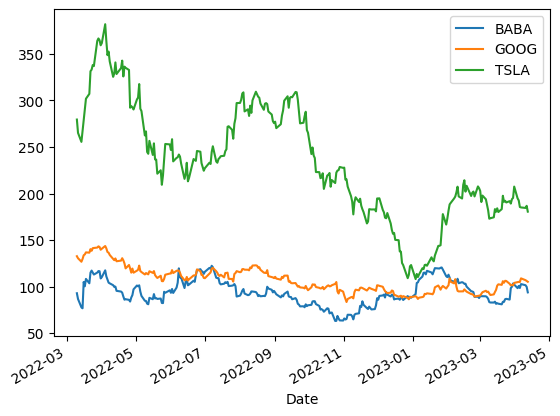

In [13]:
#close.plot(figsize=(12,8))
close.plot()

In [14]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

pd.options.plotting.backend='plotly'

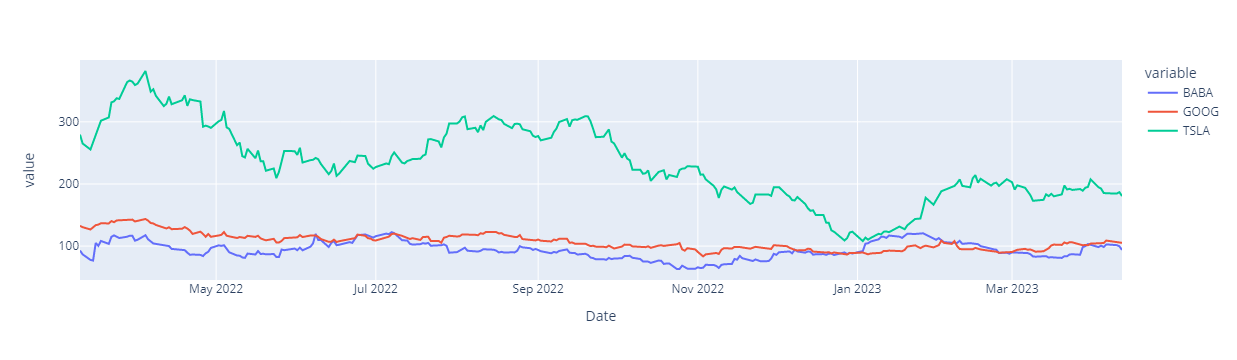

In [15]:
close.plot()

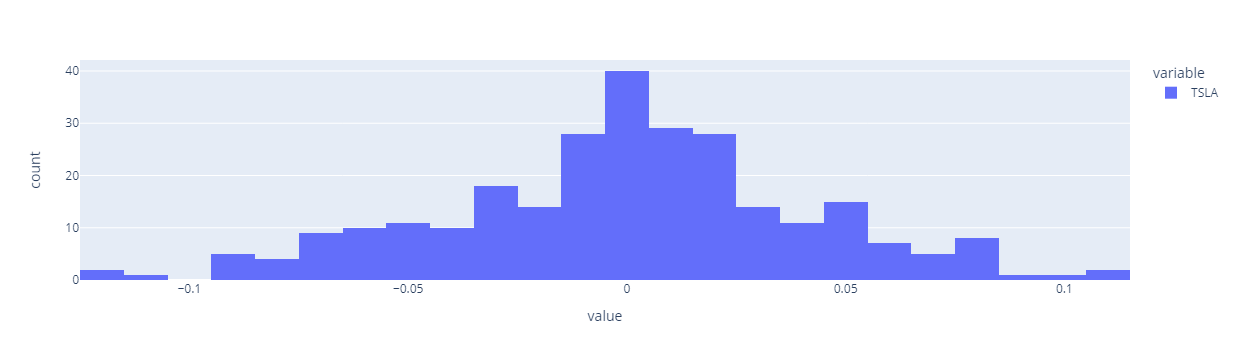

In [16]:
close['TSLA'].pct_change().plot(kind='hist')